# Big Five Cleaning and EDA

In [2]:
# import all modules you'll need to run this code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Set Pandas display options to show all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
big_five = pd.read_csv("data-final.csv", delimiter="\t", encoding="utf-8") # Load dataset sourced from Kaggle

In [6]:
print(big_five.info()) # show statistical info of dataaset
print(big_five.head()) # preview dataset head
print(big_five.isnull().sum()) # show missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 852.1+ MB
None
   EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  EST2  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0   1.0   4.0   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0   2.0   3.0   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0   4.0   4.0   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0   3.0   3.0   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0   1.0   5.0   

   EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  AGR1  AGR2  AGR3  AGR4  \
0   4.0   2.0   2.0   2.0   2.0   2.0   3.0    2.0   2.0   5.0   2.0   4.0   
1   4.0   1.0   3.0   1.0   2.0   1.0   3.0    1.0   1.0   4.0   1.0   5.0   
2   4.0   2.0   2.0   2.0   2.0   2.0   1.0    3.0   1.0   4.0   1.0   4.0   
3   3.0   2.0   

- The personality trait scores (EXT1 to OPN10) and their response times (EXT1_E to OPN10_E) all have 1,783 missing values.
- This is a very small percentage of the overall dataset, so we willl drop these rows

In [9]:
personality_trait_cols = [
    'EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10',
    'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10',
    'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10',
    'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10',
    'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10',
    'EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E',
    'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E',
    'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E',
    'CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E',
    'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E'
]

big_five_clean = big_five.dropna(subset = personality_trait_cols) # drop rows with missing values

print(big_five_clean.isnull().sum()) # verify

EXT1                        0
EXT2                        0
EXT3                        0
EXT4                        0
EXT5                        0
EXT6                        0
EXT7                        0
EXT8                        0
EXT9                        0
EXT10                       0
EST1                        0
EST2                        0
EST3                        0
EST4                        0
EST5                        0
EST6                        0
EST7                        0
EST8                        0
EST9                        0
EST10                       0
AGR1                        0
AGR2                        0
AGR3                        0
AGR4                        0
AGR5                        0
AGR6                        0
AGR7                        0
AGR8                        0
AGR9                        0
AGR10                       0
CSN1                        0
CSN2                        0
CSN3                        0
CSN4      

- The following columns will be dropped because they provide no actual value to this project
- 'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse', 'endelapse', 'IPC', 'lat_appx_lots_of_err', 'long_appx_lots_of_err'

In [14]:
big_five_clean.drop(columns=['dateload', 'screenw', 'screenh', 'introelapse', 'testelapse', 
                             'endelapse', 'IPC', 'lat_appx_lots_of_err', 'long_appx_lots_of_err'], inplace=True)

print(big_five_clean.columns)

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E', 'OPN8_E',
       'OPN9_E', 'OPN10_E', 'country'],
      dtype='object', length=101)


C:\Users\samue\AppData\Local\Temp\ipykernel_60684\2583618842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_five_clean.drop(columns=['dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',


In [16]:
print(big_five_clean.isnull().sum())

EXT1        0
EXT2        0
EXT3        0
EXT4        0
EXT5        0
EXT6        0
EXT7        0
EXT8        0
EXT9        0
EXT10       0
EST1        0
EST2        0
EST3        0
EST4        0
EST5        0
EST6        0
EST7        0
EST8        0
EST9        0
EST10       0
AGR1        0
AGR2        0
AGR3        0
AGR4        0
AGR5        0
AGR6        0
AGR7        0
AGR8        0
AGR9        0
AGR10       0
CSN1        0
CSN2        0
CSN3        0
CSN4        0
CSN5        0
CSN6        0
CSN7        0
CSN8        0
CSN9        0
CSN10       0
OPN1        0
OPN2        0
OPN3        0
OPN4        0
OPN5        0
OPN6        0
OPN7        0
OPN8        0
OPN9        0
OPN10       0
EXT1_E      0
EXT2_E      0
EXT3_E      0
EXT4_E      0
EXT5_E      0
EXT6_E      0
EXT7_E      0
EXT8_E      0
EXT9_E      0
EXT10_E     0
EST1_E      0
EST2_E      0
EST3_E      0
EST4_E      0
EST5_E      0
EST6_E      0
EST7_E      0
EST8_E      0
EST9_E      0
EST10_E     0
AGR1_E      0
AGR2_E

- since country only has 77 missing values, we will drop these rows as it is a very minor subset of the overall data.

In [21]:
big_five_clean.dropna(subset = ['country'], inplace=True) # drop rows where country is missing

C:\Users\samue\AppData\Local\Temp\ipykernel_60684\3626310073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_five_clean.dropna(subset = ['country'], inplace=True) # drop rows where country is missing


In [28]:
big_five_clean.isnull().sum() # verify dataset has no missing values

EXT1       0
EXT2       0
EXT3       0
EXT4       0
EXT5       0
EXT6       0
EXT7       0
EXT8       0
EXT9       0
EXT10      0
EST1       0
EST2       0
EST3       0
EST4       0
EST5       0
EST6       0
EST7       0
EST8       0
EST9       0
EST10      0
AGR1       0
AGR2       0
AGR3       0
AGR4       0
AGR5       0
AGR6       0
AGR7       0
AGR8       0
AGR9       0
AGR10      0
CSN1       0
CSN2       0
CSN3       0
CSN4       0
CSN5       0
CSN6       0
CSN7       0
CSN8       0
CSN9       0
CSN10      0
OPN1       0
OPN2       0
OPN3       0
OPN4       0
OPN5       0
OPN6       0
OPN7       0
OPN8       0
OPN9       0
OPN10      0
EXT1_E     0
EXT2_E     0
EXT3_E     0
EXT4_E     0
EXT5_E     0
EXT6_E     0
EXT7_E     0
EXT8_E     0
EXT9_E     0
EXT10_E    0
EST1_E     0
EST2_E     0
EST3_E     0
EST4_E     0
EST5_E     0
EST6_E     0
EST7_E     0
EST8_E     0
EST9_E     0
EST10_E    0
AGR1_E     0
AGR2_E     0
AGR3_E     0
AGR4_E     0
AGR5_E     0
AGR6_E     0
AGR7_E     0

- Lets check for duplicate rows and remove them

In [35]:
print(big_five_clean.duplicated().sum())

1982


In [36]:
big_five_clean.drop_duplicates(inplace=True)
print(big_five_clean.duplicated().sum())

C:\Users\samue\AppData\Local\Temp\ipykernel_60684\3452748309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_five_clean.drop_duplicates(inplace=True)


0


- lets check if any columns have incorrect data types and convert them if needed

In [38]:
print(big_five_clean.dtypes)

EXT1       float64
EXT2       float64
EXT3       float64
EXT4       float64
EXT5       float64
EXT6       float64
EXT7       float64
EXT8       float64
EXT9       float64
EXT10      float64
EST1       float64
EST2       float64
EST3       float64
EST4       float64
EST5       float64
EST6       float64
EST7       float64
EST8       float64
EST9       float64
EST10      float64
AGR1       float64
AGR2       float64
AGR3       float64
AGR4       float64
AGR5       float64
AGR6       float64
AGR7       float64
AGR8       float64
AGR9       float64
AGR10      float64
CSN1       float64
CSN2       float64
CSN3       float64
CSN4       float64
CSN5       float64
CSN6       float64
CSN7       float64
CSN8       float64
CSN9       float64
CSN10      float64
OPN1       float64
OPN2       float64
OPN3       float64
OPN4       float64
OPN5       float64
OPN6       float64
OPN7       float64
OPN8       float64
OPN9       float64
OPN10      float64
EXT1_E     float64
EXT2_E     float64
EXT3_E     f

In [39]:
print(big_five_clean.info())
print(big_five_clean.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1011499 entries, 0 to 1015340
Columns: 101 entries, EXT1 to country
dtypes: float64(100), object(1)
memory usage: 787.1+ MB
None
   EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  EST2  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0   1.0   4.0   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0   2.0   3.0   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0   4.0   4.0   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0   3.0   3.0   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0   1.0   5.0   

   EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  AGR1  AGR2  AGR3  AGR4  \
0   4.0   2.0   2.0   2.0   2.0   2.0   3.0    2.0   2.0   5.0   2.0   4.0   
1   4.0   1.0   3.0   1.0   2.0   1.0   3.0    1.0   1.0   4.0   1.0   5.0   
2   4.0   2.0   2.0   2.0   2.0   2.0   1.0    3.0   1.0   4.0   1.0   4.0   
3   3.0   2.0   3.0   2.0   2.0   2.0   4.0  

- I am not sure if the country column will add any value to compatability predictions, so we will analyze below

In [41]:
print(big_five_clean["country"].nunique())  # Number of unique countries
print(big_five_clean["country"].value_counts().head(20))  # Top 20 most common countries

223
country
US      545085
GB       66374
CA       61724
AU       49686
PH       19675
IN       17360
DE       14062
NONE     13677
NZ       12973
MY       11287
MX       11036
NO       10961
SE       10469
NL        9752
SG        7629
ID        6458
BR        6226
FR        6132
DK        5495
IE        5403
Name: count, dtype: int64


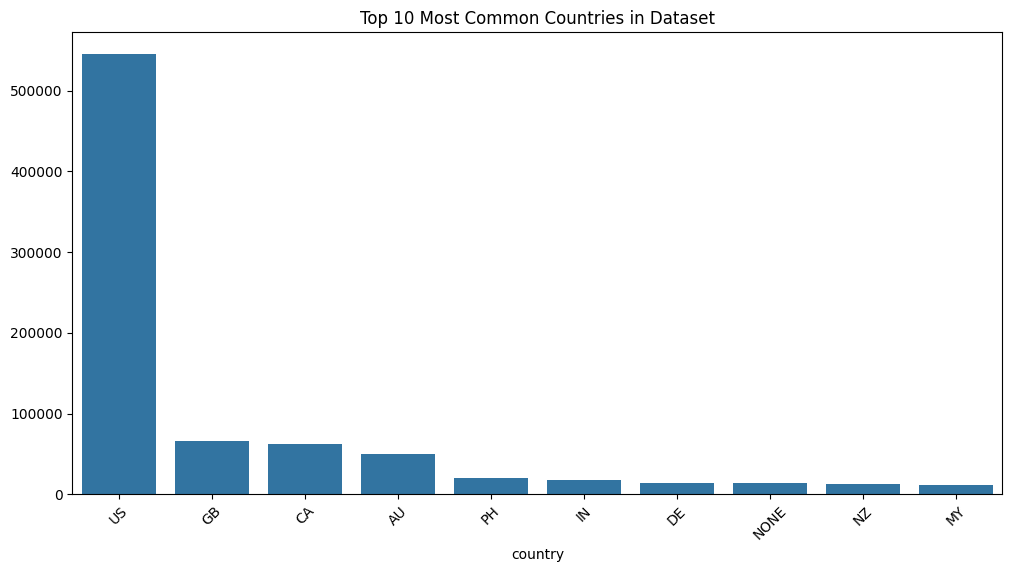

In [48]:
# visualizing the country distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=big_five_clean["country"].value_counts().index[:10], 
            y=big_five_clean["country"].value_counts().values[:10])
plt.xticks(rotation=45)
plt.title("Top 10 Most Common Countries in Dataset")
plt.show()

- we'll proceed to drop the column entirely to remove the categorical complexity

In [51]:
big_five_clean.drop(columns=['country'],inplace=True) # dropping country column
print(big_five_clean.columns)

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'EXT1_E', 'EXT2_E', 'EXT3_E',
       'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E',
       'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E',
       'EST8_E', 'EST9_E', 'EST10_E', 'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E',
       'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E', 'CSN1_E',
       'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E',
       'CSN9_E', 'CSN10_E', 'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E',
       'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E']

C:\Users\samue\AppData\Local\Temp\ipykernel_60684\1969707332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_five_clean.drop(columns=['country'],inplace=True) # dropping country column


- After referencing the data code key, I realize that all personality traits ending in _E are for the time in milliseconds that each user took to answer. We will drop these columns as well

In [54]:
big_five_clean.drop(columns=[ 
    'EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E',
    'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E',
    'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E',
    'CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E',
    'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E'
], inplace=True)

print(big_five_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1011499 entries, 0 to 1015340
Data columns (total 50 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   EXT1    1011499 non-null  float64
 1   EXT2    1011499 non-null  float64
 2   EXT3    1011499 non-null  float64
 3   EXT4    1011499 non-null  float64
 4   EXT5    1011499 non-null  float64
 5   EXT6    1011499 non-null  float64
 6   EXT7    1011499 non-null  float64
 7   EXT8    1011499 non-null  float64
 8   EXT9    1011499 non-null  float64
 9   EXT10   1011499 non-null  float64
 10  EST1    1011499 non-null  float64
 11  EST2    1011499 non-null  float64
 12  EST3    1011499 non-null  float64
 13  EST4    1011499 non-null  float64
 14  EST5    1011499 non-null  float64
 15  EST6    1011499 non-null  float64
 16  EST7    1011499 non-null  float64
 17  EST8    1011499 non-null  float64
 18  EST9    1011499 non-null  float64
 19  EST10   1011499 non-null  float64
 20  AGR1    1011499 non-null  flo

C:\Users\samue\AppData\Local\Temp\ipykernel_60684\4040451719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_five_clean.drop(columns=[


In [56]:
big_five_clean.to_csv("big_five_clean.csv", index=False) # Saving cleaned Dataset for subsequent preprocessing and modeling